In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img=cv.imread('pic.jpeg', cv.IMREAD_GRAYSCALE)
img2 = cv.resize(img, (img.shape[1] // 2, img.shape[0] // 2))
img2= img2[400:-400,:]

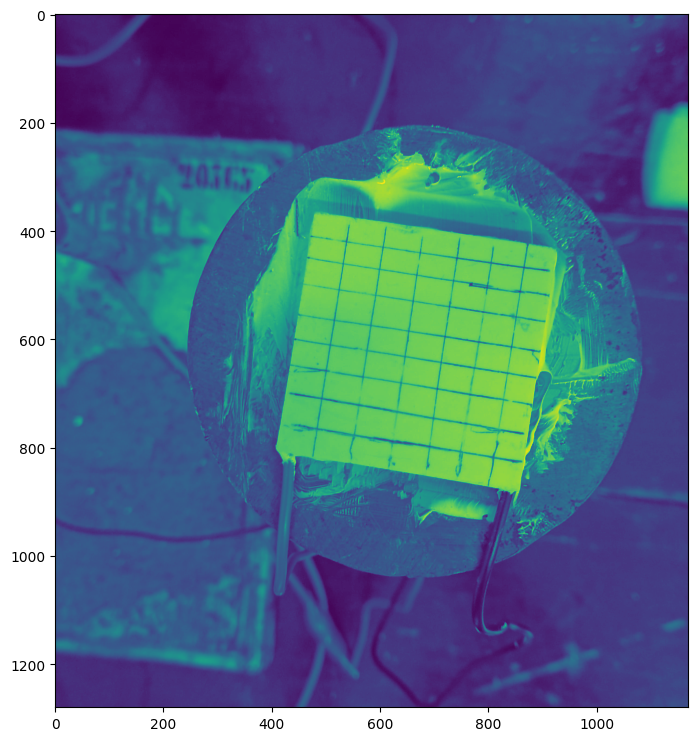

In [2]:
plt.figure(figsize=(16,9))
plt.imshow(img2)


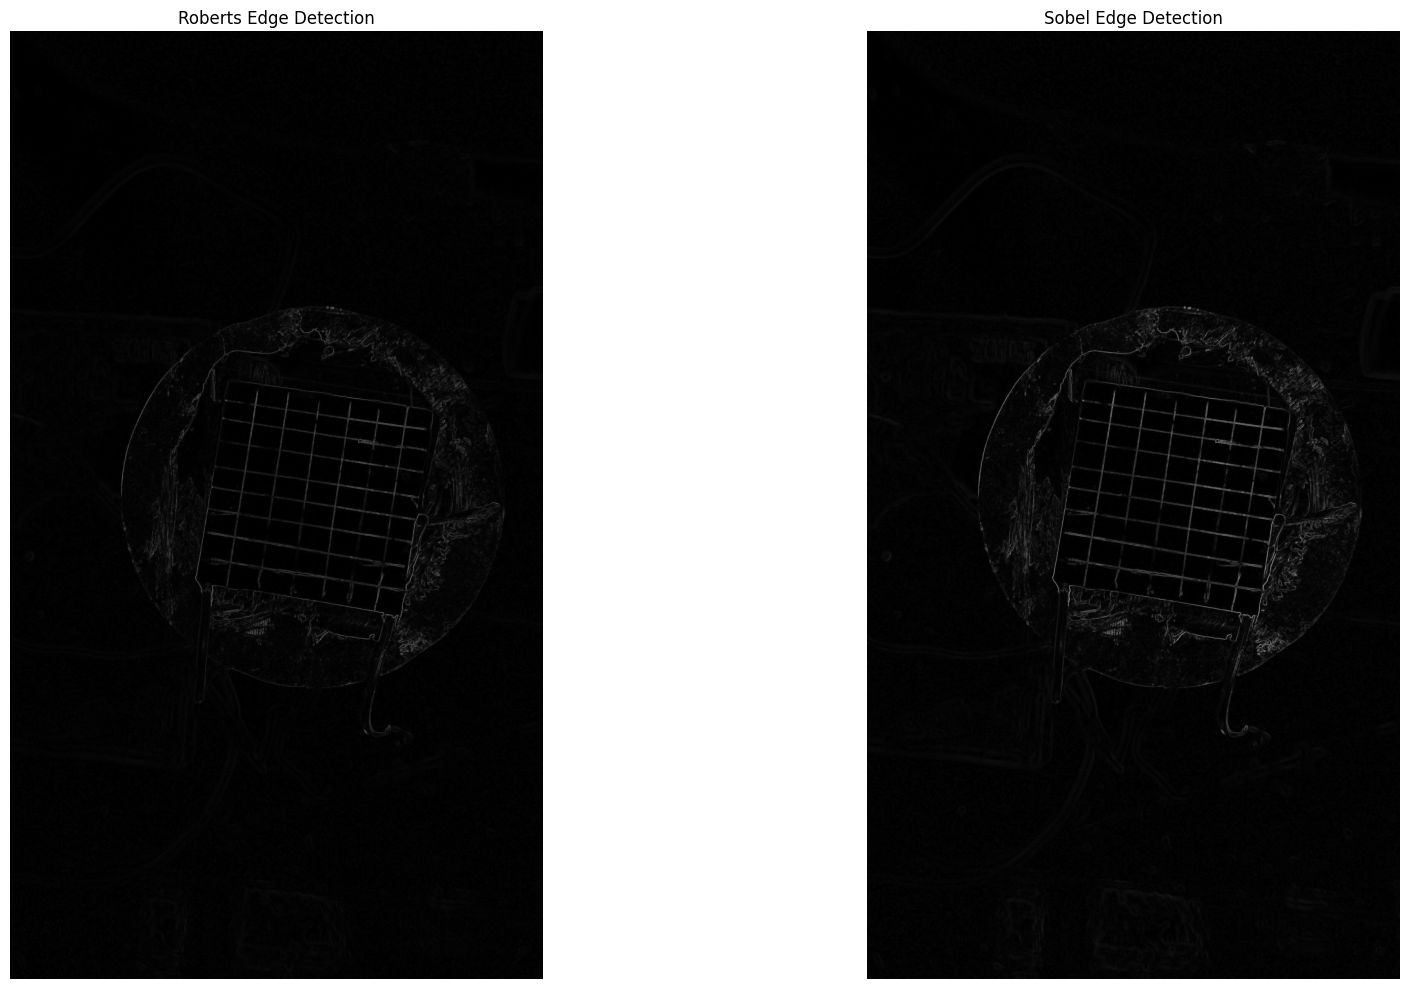

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import filters
from skimage.data import camera
from skimage.util import compare_images
from skimage import feature

image = img
edge_roberts = filters.roberts(image)
edge_sobel = filters.sobel(image)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20, 10))

axes[0].imshow(edge_roberts, cmap=plt.cm.gray)
axes[0].set_title('Roberts Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

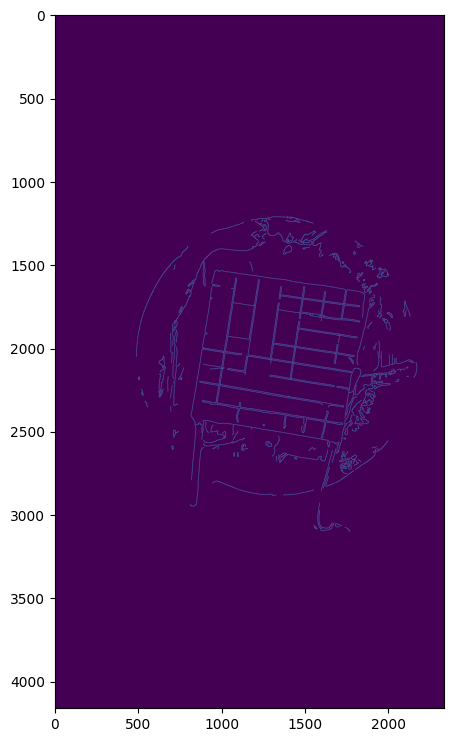

In [ ]:
edges2 = feature.canny(img, sigma=3)
plt.figure(figsize=(16,9))
plt.imshow(edges2)

45130

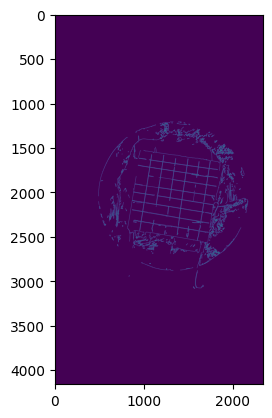

In [60]:
import cv2
import numpy as np

# Load the image
image = cv2.imread("pic.jpeg",cv2.IMREAD_GRAYSCALE)
kernel=3
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.IMREAD_GRAYSCALE)

blurred = cv2.GaussianBlur(img, (kernel, kernel), sigmaX=3)

# Canny edge detection (you may need to tune these thresholds)
edges = cv2.Canny(blurred, 50, 150)

plt.figure()
plt.imshow(edges)



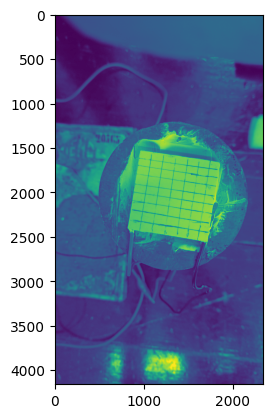

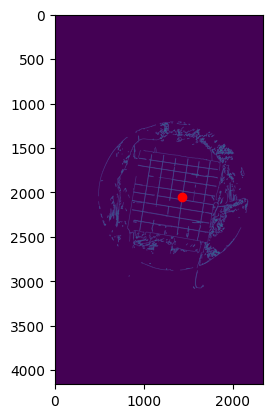

In [61]:

# Find contours from edges
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours and compute centroid(s)
for edge in contours:
    M = cv2.moments(edges)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        # Draw the centroid on the image
        # cv2.circle(image, (cx, cy), 5, (0, 0, 255), -1)

# Show results
plt.figure()
plt.imshow(image)
plt.figure()
plt.imshow(edges)
plt.plot(cx,cy,'ro')

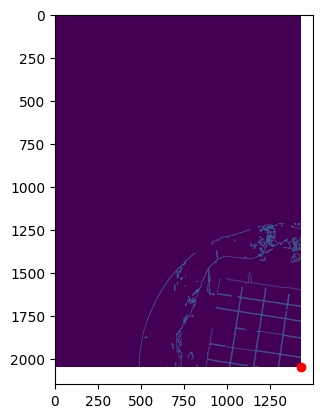

In [93]:
plt.imshow(edges[:cy,:cx])
plt.plot(cx,cy,'ro')

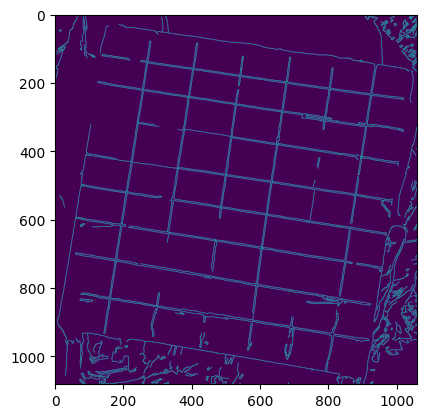

In [109]:
img2=edges
xx=640  
yy=600
img2= img2[1501:2583 , 808:1867]
plt.imshow(img2)

In [110]:
"""
@file hough_lines.py
@brief This program demonstrates line finding with the Hough transform
"""
import sys
import math
import cv2 as cv
import numpy as np


def main(argv):
    ## [load]
    default_file = 'pic.jpeg'
    filename = argv[0] if len(argv) > 0 else default_file

    # Loads an image
    src = img2

    # Check if image is loaded fine
    if src is None:
        print ('Error opening image!')
        print ('Usage: hough_lines.py [image_name -- default ' + default_file + '] \n')
        return -1
    ## [load]

    ## [edge_detection]
    # Edge detection
    dst = cv.Canny(src, 50, 200, None, 3)
    ## [edge_detection]

    # Copy edges to the images that will display the results in BGR
    cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
    cdstP = np.copy(cdst)

    ## [hough_lines]
    #  Standard Hough Line Transform
    lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
    ## [hough_lines]
    ## [draw_lines]
    # Draw the lines
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))

            cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
    ## [draw_lines]

    ## [hough_lines_p]
    # Probabilistic Line Transform
    linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
    ## [hough_lines_p]
    ## [draw_lines_p]
    # Draw the lines
    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
    ## [draw_lines_p]
    ## [imshow]
    # Show results
    cv.imshow("Source", src)
    cv.imshow("Detected Lines (in red) - Standard Hough Line Transform", cdst)
    cv.imshow("Detected Lines (in red) - Probabilistic Line Transform", cdstP)
    ## [imshow]
    ## [exit]
    # Wait and Exit
    cv.waitKey()
    return 0
    ## [exit]

if __name__ == "__main__":
    main(sys.argv[1:])
